In [91]:
from nltk.stem import RSLPStemmer
from nltk.tokenize import word_tokenize
import spacy
import string
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
nlp = spacy.load("pt_core_news_sm")


In [92]:

def Lematizar(texto):
    
    doc = nlp(texto)


    lemmas = [token.lemma_ for token in doc]


    texto_lematizado = " ".join(lemmas)

    return lemmas


### Função de Lematização em PLN

A função `Lematizar(texto)` é usada para realizar a lematização de um texto em português, utilizando a biblioteca spaCy. Abaixo, uma descrição passo a passo do funcionamento da função:

1. `doc = nlp(texto)`: Nesta etapa, o texto de entrada é processado pelo objeto `nlp`, que representa o modelo de processamento de linguagem natural do spaCy em português. Isso inclui a tokenização do texto (divisão em palavras e pontuações), análise morfológica e a atribuição de informações linguísticas a cada token.

2. `lemmas = [token.lemma_ for token in doc]`: Aqui, uma lista chamada `lemmas` é criada usando uma compreensão de lista. Para cada token no documento processado, o lema (forma base da palavra) é extraído usando o atributo `lemma_` do token. Essa lista contém os lemas correspondentes a cada palavra no texto original.

3. `texto_lematizado = " ".join(lemmas)`: Esta linha junta os lemas em uma única string, separados por espaços em branco. Isso cria uma representação lematizada do texto original, onde as palavras foram reduzidas às suas formas base.

4. `return lemmas`: Finalmente, a função retorna a lista de lemas obtidos do texto. Isso significa que, quando a função `Lematizar(texto)` é chamada, ela processa o texto, extrai os lemas e retorna uma lista contendo os lemas de cada palavra no texto.

A lematização é útil para simplificar palavras em suas formas essenciais, o que facilita a análise linguística e a extração de informações de texto. É uma técnica importante em processamento de linguagem natural (PLN).


In [93]:

def Stemmer(texto):

    stemmer = RSLPStemmer()

    doc = nlp(texto)


    raiz = [stemmer.stem(token.text) for token in doc]


    texto_stemizado = " ".join(raiz)


    return raiz


### Função de Stemming em PLN

A função `Stemmer(texto)` é usada para realizar a stemming de um texto em português, utilizando o stemmer RSLP do NLTK (Natural Language Toolkit). A seguir, uma descrição passo a passo do funcionamento da função:

1. `stemmer = RSLPStemmer()`: Nesta etapa, um objeto chamado `stemmer` é criado utilizando o stemmer RSLP do NLTK. O stemmer é responsável por reduzir as palavras a sua forma raiz, removendo sufixos e prefixos.

2. `doc = nlp(texto)`: O texto de entrada é processado pelo spaCy, que é representado pelo objeto `nlp`. Isso inclui a tokenização do texto (divisão em palavras e pontuações) e a análise morfológica, onde informações linguísticas são atribuídas a cada token.

3. `raiz = [stemmer.stem(token.text) for token in doc]`: Nesta linha, uma lista chamada `raiz` é criada usando uma compreensão de lista. Para cada token no documento processado, o stemmer RSLP é aplicado para reduzir a palavra à sua forma raiz. O resultado é uma lista contendo as formas stemizadas das palavras.

4. `texto_stemizado = " ".join(raiz)`: Aqui, as palavras stemizadas na lista `raiz` são unidas em uma única string, separadas por espaços em branco. Isso cria uma representação stemizada do texto original.

5. `return raiz`: Finalmente, a função retorna a lista de palavras stemizadas obtidas do texto. Isso significa que, quando a função `Stemmer(texto)` é chamada, ela processa o texto, aplica a stemming e retorna uma lista contendo as formas stemizadas das palavras no texto.

A stemming é útil para simplificar palavras, reduzindo-as à sua forma raiz, o que pode ser útil em tarefas como recuperação de informações e classificação de texto.

Lembrando que o stemmer RSLP do NLTK é uma técnica de stemming específica para o português.


In [94]:
# Tokenização (word)
def tokenizar(caminho):

    with open(caminho, 'r', encoding='utf-8') as file:
        texto = file.read()

    palavras = word_tokenize(texto)

    return palavras

# Remoção de pontuações e outros caracteres especiais
def removerPontuacao(palavras):

    result = []

    for palavra in palavras:
        if palavra not in string.punctuation:
            result.append(palavra)

    return result


# Remoção de stopwords
def removerStopWord(palavras, stopwords):

    result = []

    for palavra in palavras:
        if palavra not in stopwords:
            result.append(palavra)

    return result


# Quantidade de types
def Tokens(texto):

    palavras = word_tokenize(texto)

    result = []

    for palavra in palavras:
        if palavra not in string.punctuation:
            result.append(palavra)

    return result


def MaisFrequentes(palavras, n):

    freq = FreqDist(palavras)

    palavras_frequentes = freq.most_common(n)

    return palavras_frequentes


# Ranking dos 20 types mais frequentes no texto
def ranking_20(palavras, nomeGrafico):

    freq = FreqDist(palavras)

    plt.figure(figsize=(8, 4))
    freq.plot(20, title="Frequência de Palavras " + "("+nomeGrafico+")")


capivara nome científico hydrochoerus hydrochaeris espécie mamífero roedor família caviidae subfamília hydrochoerinae alguns autores consideram deva ser classificada família própria incluída grupo roedores classificam pacas cutias preás porquinho-da-índia ocorre toda américa sul leste andes habitats associados rios lagos pântanos nível mar 1 300 m altitude extremamente adaptável pode ocorrer ambientes altamente alterados ser humano maior roedor mundo pesando 91 kg medindo 1,2 m comprimento 60 cm altura pelagem densa cor avermelhada marrom escuro possível distinguir machos conta presença glândula proeminente focinho apesar dimorfismo sexual ser aparente existe série adaptações sistema digestório herbivoria principalmente ceco alcança maturidade sexual cerca 1,5 ano idade fêmeas dão luz geralmente quatro filhotes vez pesando 1,5 kg nascem dentição permanente cativeiro pode viver 12 anos idade
[('roedor', 3), ('ser', 3), ('família', 2), ('classificar', 2), ('ocorrer', 2), ('m', 2), ('pode

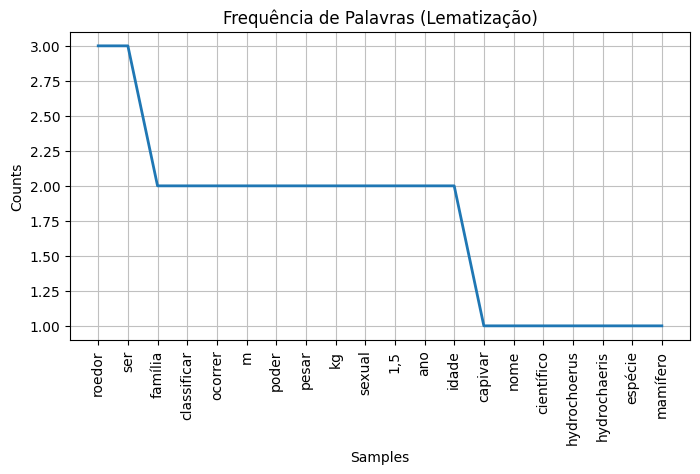

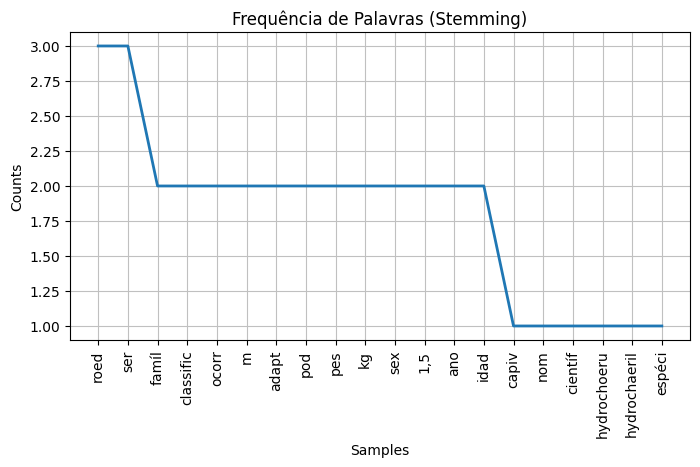

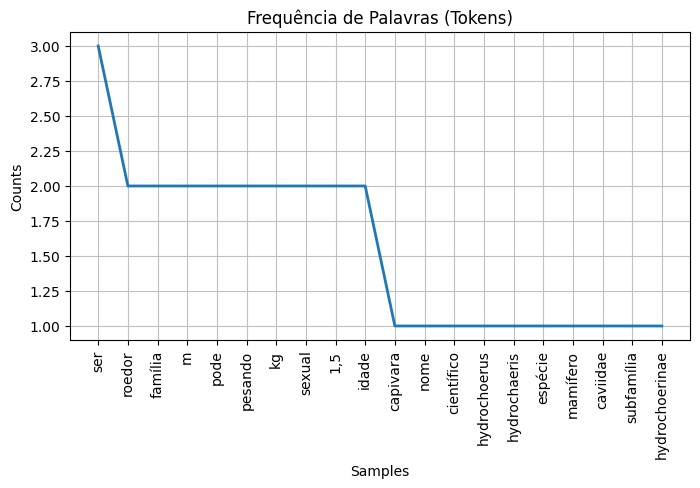

In [95]:
texto = tokenizar("database\capivara-pt.txt")
stopwords= tokenizar("database\stopwords-pt.txt")


texto_pre = removerStopWord(removerPontuacao(texto), stopwords)

texto_pronto = " ".join(texto_pre)

print(texto_pronto)

print(MaisFrequentes(Lematizar(texto_pronto),20))

print(MaisFrequentes(Stemmer(texto_pronto),20))

print(MaisFrequentes(Tokens(texto_pronto),20))


ranking_20(Lematizar(texto_pronto), "Lematização")

ranking_20(Stemmer(texto_pronto), "Stemming")

ranking_20(Tokens(texto_pronto), "Tokens")


